In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Sales-Win-Loss.csv")
data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["Won", "Loss"])
list(le.classes_)
data['Opportunity'] = le.transform(data['Opportunity Result'])
data

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category,Opportunity
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1,0
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1,0
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.00000,0.000000,0.000000,6,0
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.00000,0.000000,0.000000,5,1
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.00000,0.000000,0.000000,4,0
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.00000,0.000000,0.000000,5,0


In [4]:
X = data[['Elapsed Days In Sales Stage','Sales Stage Change Count', 'Total Days Identified Through Closing', 
        'Total Days Identified Through Qualified']]
y = data['Opportunity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    stratify=y,
                                                    random_state=123)

print(y_train)
print(y_test)

21053    0
39819    1
3417     0
3378     1
27192    0
        ..
33542    0
62011    0
66094    0
12509    0
71638    0
Name: Opportunity, Length: 54617, dtype: int32
75759    0
43176    0
77439    0
25523    0
9773     0
        ..
54772    0
4581     0
5074     0
74143    0
60201    0
Name: Opportunity, Length: 23408, dtype: int32


In [5]:

print('Training : ', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Testing : ', np.bincount(y_test) / float(len(y_test)) * 100.0)

Training :  [77.408133 22.591867]
Testing :  [77.40943267 22.59056733]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(y_train)

[[ 0.39179027 -0.6387048  -0.2189948  -0.19586608]
 [-0.54717628 -1.30915395 -1.00370397 -0.98807456]
 [ 0.50446626  2.04309182  2.31621944  2.3635767 ]
 ...
 [-0.84764558 -0.6387048  -1.00370397 -0.98807456]
 [ 1.59366746 -0.6387048  -1.00370397 -0.98807456]
 [-0.81008692  0.70219351 -0.33971929 -0.31774431]]
21053    0
39819    1
3417     0
3378     1
27192    0
        ..
33542    0
62011    0
66094    0
12509    0
71638    0
Name: Opportunity, Length: 54617, dtype: int32


In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4),solver='lbfgs',activation='tanh',
                    random_state=150,learning_rate_init=0.01,max_iter=500)
#help(mlp)

In [8]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.01, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=150, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Predicting Win/Loss on the test set using Multi-Layer Precepiton")

y_pred = mlp.predict(X_test)

print("Accurary : ", round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting Win/Loss on the test set using Multi-Layer Precepiton
Accurary :  0.8292
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     18120
           1       0.69      0.44      0.54      5288

    accuracy                           0.83     23408
   macro avg       0.77      0.69      0.72     23408
weighted avg       0.82      0.83      0.81     23408

[[17070  1050]
 [ 2949  2339]]


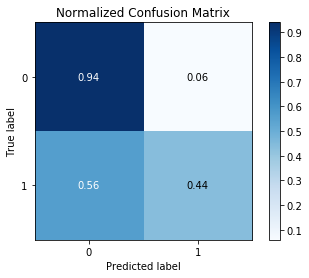

In [10]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# AUC: the higher the better -> close to 1

AUC: 0.692


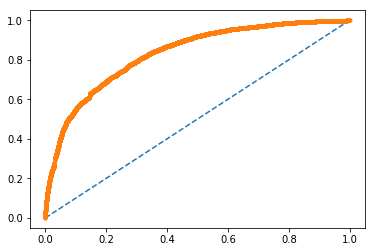

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curve
y_pred_prob = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Intepret: TPR (True Positive Rate) high, TNR high
# the graph below is used for comparing different models